In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

rating_data = pd.read_csv('ratings.csv')
rating_data.head()
movie_desc_data = pd.read_csv('movies_desc.csv')
movie_desc_data.head()

combined_data = pd.merge(rating_data,movie_desc_data,on = 'movieId')
combined_data.head()

,user_id,movieId,rating,timestamp,title,genres
0,196,242,3,881250949,Farinelli: il castrato (1994),Drama|Musical
1,63,242,3,875747190,Farinelli: il castrato (1994),Drama|Musical
2,226,242,5,883888671,Farinelli: il castrato (1994),Drama|Musical
3,154,242,3,879138235,Farinelli: il castrato (1994),Drama|Musical
4,306,242,5,876503793,Farinelli: il castrato (1994),Drama|Musical


,rating,mov_counts
title,,
"Usual Suspects, The (1995)",4.358491,583
"Kid in King Arthur's Court, A (1995)",3.803536,509
City Hall (1996),4.155512,508
Mighty Morphin Power Rangers: The Movie (1995),4.007890,507
"Perez Family, The (1995)",3.156701,485
Nemesis 2: Nebula (1995),3.656965,481
Natural Born Killers (1994),3.441423,478
Toy Story (1995),3.878319,452
Quiz Show (1994),3.631090,431


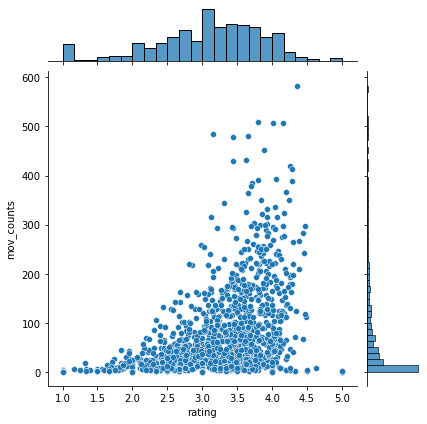

In [22]:
## EDA
combined_data.describe()

# Average rating for all the movies
mov_ratings = pd.DataFrame(combined_data.groupby('title')['rating'].mean())
mov_ratings.head()

# Which movie has been rated how many times

mov_ratings['mov_counts'] = pd.DataFrame(combined_data.groupby('title')['rating'].count())
mov_ratings.head()

# most rated movies
mov_ratings.sort_values('mov_counts', ascending = False).head(10)

# Vizualize the ratings and counts in a joint plot
sns.jointplot(x = 'rating', y = 'mov_counts', data = mov_ratings)



## Creating user item interaction matrix

In [21]:
movie_UIIM =  combined_data.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
movie_UIIM.head(10)

title,'Til There Was You (1997),1-900 (06) (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (One Eight Seven) (1997),2 Days in the Valley (1996),2 ou 3 choses que je sais d'elle (2 or 3 Things I Know About Her) (1967),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"301, 302 (301/302) (1995)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),"Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985)",Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Recomending a set of movies to those who have watched/rated 'Toy Story'

# Three Steps process

# Step-1 : Filtering the users who have watched/rated 'Toy Story'

# Step-2 : Finding the most similar movies with 'Toy Story'

# Step-3 : adding the reccomendations to the users

In [44]:
#Step-1 : Filtering the users who have watched/rated 'Toy Story'
TS_user_ratings = movie_UIIM['Toy Story (1995)']


In [35]:
# Step-2 : Finding the most similar movies with 'Toy Story'
similar_to_ts = movie_UIIM.corrwith(TS_user_ratings)
corr_ts = pd.DataFrame(similar_to_ts,columns = ['correlation'])
corr_ts.dropna(inplace = True)
corr_ts.head()

corr_ts = corr_ts.join(mov_ratings['mov_counts'])
corr_ts.head()

# Give me the corr of those movies which has been reviewed by atleast 20 users
corr_ts[corr_ts['mov_counts'] > 20].sort_values(by = 'correlation',ascending = False).head(6)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,mov_counts
title,,
Toy Story (1995),1.000000,452
Body Snatchers (1993),0.753673,32
Sleepless in Seattle (1993),0.736826,44
My Favorite Year (1982),0.672918,46
Nelly & Monsieur Arnaud (1995),0.668410,27
Underneath (1995),0.661495,21


In [54]:
# Step-3 : adding the reccomendations for the list of viewers
TS_user_ratings.head(20)
TS_user_ratings.dropna(inplace = True)
TS_user_ratings.head(500)

user_id
1      5.0
2      4.0
5      4.0
6      4.0
10     4.0
      ... 
934    2.0
935    3.0
936    4.0
938    4.0
941    5.0
Name: Toy Story (1995), Length: 452, dtype: float64